In [1]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
age_file = "suicide-death-rate-by-age.csv"
sr_by_age = pd.read_csv(age_file)
sr_by_age.head()

,Entity,Code,Year,"All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","15-49 years old (per 100,000)","5-14 years old (per 100,000)","Age-standardized (per 100,000)"
0,Afghanistan,AFG,1990,5.895373,18.010179,8.941423,11.099777,0.410967,9.210877
1,Afghanistan,AFG,1991,6.011665,18.072845,9.158262,11.214831,0.414742,9.344000
2,Afghanistan,AFG,1992,6.130514,17.993764,9.364500,11.330904,0.418220,9.469053
3,Afghanistan,AFG,1993,6.244526,18.095485,9.550515,11.444176,0.423134,9.581032
4,Afghanistan,AFG,1994,6.402756,18.294775,9.807171,11.668494,0.432550,9.778655


In [3]:
#step1 = sr_by_age.groupby (by = "Entity", as_index = True)
#step2 = step1.sum()

In [4]:
#step2#.columns

In [5]:
step1 = sr_by_age[(sr_by_age['Year'] == 2000) | (sr_by_age['Year'] == 2010) | (sr_by_age['Year'] == 2015)]
step1.reset_index(inplace = True)
step1.head()

,index,Entity,Code,Year,"All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","15-49 years old (per 100,000)","5-14 years old (per 100,000)","Age-standardized (per 100,000)"
0,10,Afghanistan,AFG,2000,6.627822,19.050460,10.332551,12.216295,0.429288,10.263789
1,20,Afghanistan,AFG,2010,6.479521,20.399820,10.330032,11.788987,0.380752,10.151342
2,25,Afghanistan,AFG,2015,6.704211,20.146881,10.275797,11.655039,0.462305,10.133863
3,37,Albania,ALB,2000,5.584430,8.891786,6.302860,8.166355,0.703493,5.935824
4,47,Albania,ALB,2010,6.667050,10.123944,7.151608,8.571616,0.991047,6.382372


In [6]:
step1 = step1.drop(["index", "Code","All ages (per 100,000)"], axis=1)
step2 = step1.rename(columns = {"Entity" : "Country", "70+ years old (per 100,000)" : "70+",
                               "50-69 years old (per 100,000)" : "50-69",
                               "15-49 years old (per 100,000)" : "15-49",
                               "5-14 years old (per 100,000)" : "5-14",
                               "Age-standardized (per 100,000)" : "Age-standardized"})
step2.head()


,Country,Year,70+,50-69,15-49,5-14,Age-standardized
0,Afghanistan,2000,19.050460,10.332551,12.216295,0.429288,10.263789
1,Afghanistan,2010,20.399820,10.330032,11.788987,0.380752,10.151342
2,Afghanistan,2015,20.146881,10.275797,11.655039,0.462305,10.133863
3,Albania,2000,8.891786,6.302860,8.166355,0.703493,5.935824
4,Albania,2010,10.123944,7.151608,8.571616,0.991047,6.382372


In [7]:
step3 = step2.groupby(by = ["Country"], as_index = True)
step4 = step3.sum()
step4.head()

,Year,70+,50-69,15-49,5-14,Age-standardized
Country,,,,,,
Afghanistan,6025,59.597161,30.938380,35.660322,1.272346,30.548994
Albania,6025,28.440555,20.246626,24.462944,2.465123,18.071137
Algeria,6025,18.958949,13.475690,15.042717,0.732727,11.455080
American Samoa,6025,34.469222,23.039687,28.933607,1.436972,21.782754
Andean Latin America,6025,30.759129,21.869385,21.240253,2.760179,16.861334


In [8]:
step5 = step4.sort_values(["Age-standardized"], ascending=False)
step5.reset_index(inplace=True)
step6 = step5.head()

In [9]:
top_5_sr_age_countries = list(step6['Country'])
top_5_sr_age_countries

['Greenland', 'Lesotho', 'Russia', 'Lithuania', 'Eastern Europe']

     Country    Year       5-14       15-49      50-69         70+
0  Greenland  2000.0  18.644972  156.399292  98.916166  117.058991
1  Greenland  2010.0  16.212726  130.146875  82.687430  108.585301
2  Greenland  2015.0  13.567881  113.881004  71.070038  102.720357


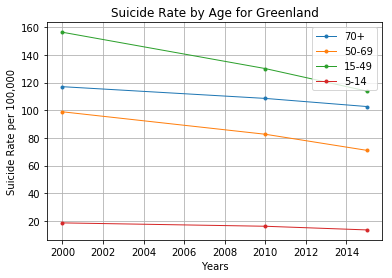

   Country    Year      5-14      15-49      50-69         70+
0  Lesotho  2000.0  0.229298  25.592969  60.066495  106.967185
1  Lesotho  2010.0  0.297418  31.802557  68.585770  122.425713
2  Lesotho  2015.0  0.278575  32.888072  68.640059  124.721803


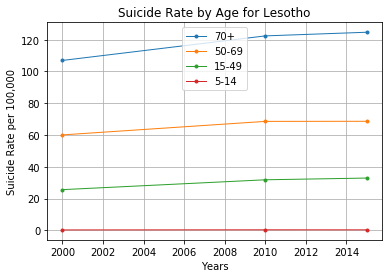

  Country    Year      5-14      15-49      50-69        70+
0  Russia  2000.0  2.596544  61.221777  67.311124  55.642775
1  Russia  2010.0  1.495024  45.707734  45.691999  42.818131
2  Russia  2015.0  1.290356  43.208279  41.295066  41.421144


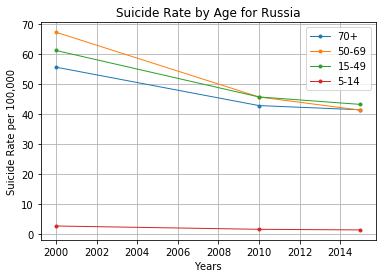

     Country    Year      5-14      15-49      50-69        70+
0  Lithuania  2000.0  1.399938  53.707323  70.430252  47.496872
1  Lithuania  2010.0  1.130260  45.422580  59.873073  41.168186
2  Lithuania  2015.0  1.017136  40.507529  53.313206  38.773354


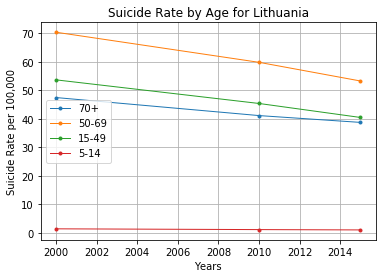

          Country    Year      5-14      15-49      50-69        70+
0  Eastern Europe  2000.0  2.275390  54.767170  63.179542  51.309878
1  Eastern Europe  2010.0  1.352605  40.660186  43.253435  39.159225
2  Eastern Europe  2015.0  1.133195  38.082375  38.855978  37.470871


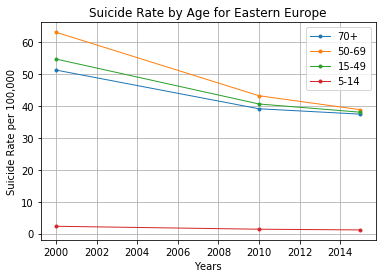

In [10]:
x_axis = step2['Year'].unique()
for country in list(top_5_sr_age_countries):
    #print (country)
    df_name = 'sr_age_df_' + country
    #print(df_name)
    df_name = pd.DataFrame()
    for index,row in step2.iterrows():
        if row['Country'] == country:
            df_name = df_name.append({'Country' : row['Country'], 'Year' : row['Year'], '70+' : row['70+'], '50-69' : row['50-69'], '15-49' : row ['15-49'], '5-14' : row ['5-14']}, ignore_index=True)
    df_name = df_name [['Country', 'Year', '5-14', '15-49', '50-69', '70+']]
    print (df_name)
    
    y_age_5_14 = list (df_name['5-14'])
    y_age_15_49 = list (df_name['15-49'])
    y_age_50_69 = list (df_name['50-69'])
    y_age_70plus = list (df_name['70+'])
    
    fig, ax = plt.subplots()

    line1, = ax.plot(x_axis, y_age_70plus, label =  '70+', linewidth=1, marker=".")
    line2, = ax.plot(x_axis, y_age_50_69, label =  '50-69', linewidth=1, marker=".")
    line3, = ax.plot(x_axis, y_age_15_49, label =  '15-49', linewidth=1, marker=".")
    line4, = ax.plot(x_axis, y_age_5_14, label =  '5-14', linewidth=1, marker=".")

    ax.legend(loc='best')
    plt.title(f"Suicide Rate by Age for {country}")
    plt.xlabel("Years")
    plt.ylabel("Suicide Rate per 100,000")
    plt.grid()
    plt.savefig(f"Images/Suicide_Rate_by_Age_for_{country}.png")
    plt.show()
